# This notebook estimates and compares Einstein radii of candidates from each method based on Barnabe 2011 FDM of 61% with the Einstein radii reported by SLACS, S4TM, and BELLS.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [2]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

In [3]:
### Samples as of 2/19/19
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Bolton_2008_gradeA_lenses.csv')
s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/S4TM_Shu_2017_gradaA_lenses.csv')
bells = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Brownstein_BELLS_GradeA_lenses.csv')


In [46]:
mac

,Unnamed: 0,Unnamed: 0.1,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z,theta_e
0,0,0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027,1.448577
1,1,1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272,1.542310
2,2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216,1.715374
3,3,3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221,1.463153
4,4,4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059,1.159976
5,5,5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652,1.501378
6,6,6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373,1.643379
7,7,7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481,1.186713
8,8,8,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794,1.263956
9,9,9,371400.0,2275.0,131.20438,1.00064,18.0,2.021000e+11,0.2948,1.326142


## Plot all six on histogram

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(1.325, 11.2, '2 PSF')

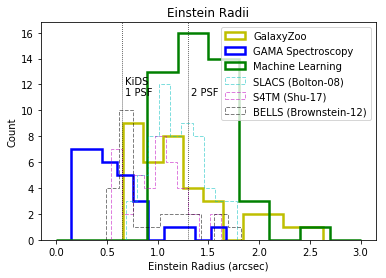

In [17]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radii")
plt.hist(zoo.theta_e,bins=10,color='y',label='GalaxyZoo', histtype = 'step', linewidth=2.5)
plt.hist(spec.theta_e2,bins=10,color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e,bins=10, range=[0.0,3.0],color='g',label='Machine Learning', histtype = 'step', linewidth=2.5)
plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.675, 11.2, '1 PSF')
plt.text(0.675, 12, 'KiDS')
plt.text(1.325, 11.2, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_six_samples.png')


Text(0, 0.5, 'Lens Score (out of 70)')

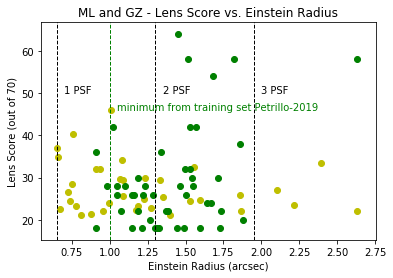

In [18]:
plt.scatter(zoo.theta_e, zoo.LENS_SCORE*70,color='y',label='Zoo')
plt.scatter(mac.theta_e, mac.SCORE,color='g',label='Mac')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
plt.text(1.05, 46, 'minimum from training set Petrillo-2019', color = 'g')
plt.title('ML and GZ - Lens Score vs. Einstein Radius')
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/mac_zoo_theta_e_score.png')

Text(0, 0.5, 'Lens Score (out of 70)')

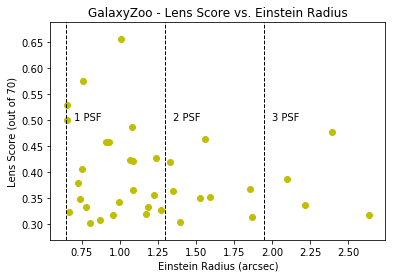

In [19]:
plt.scatter(zoo.theta_e, zoo.LENS_SCORE,color='Y',label='Zoo')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 0.5, '1 PSF')
plt.text(1.35, 0.5, '2 PSF')
plt.text(2, 0.5, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Einstein Radius')
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/zoo_theta_e_score.png')

### Make two separate histograms. 1 with the three methods from the study, the other with the three other surveys.

In [28]:
zoo.theta_e.max()
# G136604

2.6336356585837666

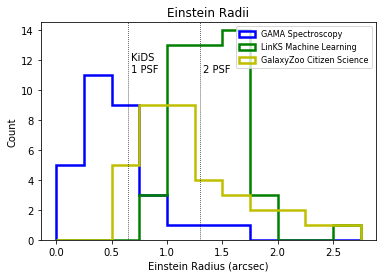

In [17]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radii")

plt.ylim(0,14.5)

plt.hist(spec.theta_e2,bins=11,range=[0.0,2.75],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=2.5)
plt.hist(zoo.theta_e,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=2.5)
#plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.fill_betweenx(x1=0.1, x2=0.2, y=(0,15),# Fill region for false candidates
 #                facecolor="purple", # The fill color
  #               color='purple',       # The outline color
   #              alpha=0.15, # Transparency of the fill
    #            label='NextGen Resolution')

plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 11.2, '1 PSF')
plt.text(0.675, 12, 'KiDS')
plt.text(1.325, 11.2, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_three_methods_nextgen.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_three_methods_nextgen.pdf')


/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


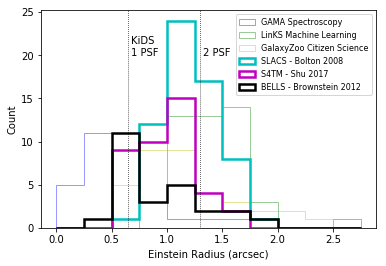

In [21]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
#plt.title("Einstein Radii")
plt.hist(spec.theta_e2,bins=11,range=[0.0,2.75],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(mac.theta_e,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(zoo.theta_e,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(slacs.theta_e_sie,bins=11,range=[0.0,2.75],color='c',label='SLACS - Bolton 2008', histtype = 'step', linewidth=2.5)
plt.hist(s4tm.theta_e_sie,bins=11,range=[0.0,2.75],color='m',label='S4TM - Shu 2017', histtype = 'step', linewidth=2.5)
plt.hist(bells.theta_e_sie,bins=11,range=[0.0,2.75],color='k',label='BELLS - Brownstein 2012', histtype = 'step', linewidth=2.5)
plt.legend(loc='upper right', fontsize=8)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.675, 20, '1 PSF')
plt.text(0.675, 21.3, 'KiDS')
plt.text(1.325, 20, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_other_surveys.pdf')